In [55]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [56]:
ETCGRecent_Data = Path("../Resources1/ETCGRecent_Data.csv")
GLDRecent_Data = Path("../Resources1/GLDRecent_Data.csv")
GBTCRecent_Data = Path("../Resources1/GBTCRecent_Data.csv")
SLVRecent_Data = Path("../Resources1/SLVRecent_Data.csv")

In [57]:
# Read the CSVs and set the `date` column as a datetime index to the DataFrame
ETCGRecent_Data_df = pd.read_csv(ETCGRecent_Data, index_col="Date", infer_datetime_format=True, parse_dates=True)
GLDRecent_Data_df = pd.read_csv(GLDRecent_Data, index_col="Date", infer_datetime_format=True, parse_dates=True)
GBTCRecent_Data_df = pd.read_csv(GBTCRecent_Data, index_col="Date", infer_datetime_format=True, parse_dates=True)
SLVRecent_Data_df = pd.read_csv(SLVRecent_Data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [58]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([ETCGRecent_Data_df, GLDRecent_Data_df, GBTCRecent_Data_df, SLVRecent_Data_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Set column names
combined_df.columns = ['ETCG', 'GLD', 'GBTC', 'SLV']

# Display a few rows
combined_df.head()

,ETCG,GLD,GBTC,SLV
Date,,,,
2020-02-20,18.90,152.41,12.33,17.14
2020-02-21,19.66,154.70,12.54,17.28
2020-02-24,19.50,156.09,11.72,17.40
2020-02-25,15.80,153.30,10.54,16.71
2020-02-26,15.25,153.97,10.36,16.68


In [59]:
# Use the `pct_change` function to calculate daily returns
daily_returns = combined_df.pct_change()
daily_returns.head()

,ETCG,GLD,GBTC,SLV
Date,,,,
2020-02-20,NaN,NaN,NaN,NaN
2020-02-21,0.040212,0.015025,0.017032,0.008168
2020-02-24,-0.008138,0.008985,-0.065391,0.006944
2020-02-25,-0.189744,-0.017874,-0.100683,-0.039655
2020-02-26,-0.034810,0.004371,-0.017078,-0.001795


In [60]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
volatility = daily_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

GLD     0.322738
SLV     0.565561
GBTC    1.292388
ETCG    1.751277
dtype: float64

In [61]:
# Set weights for corresponding risk profile of stocks, use the `dot` function to multiply each weight by the corresponding stock daily return
weights = [0.25, 0.25, 0.25, 0.25]
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

Date
2020-02-20         NaN
2020-02-21    0.020109
2020-02-24   -0.014400
2020-02-25   -0.086989
2020-02-26   -0.012328
dtype: float64

In [62]:
# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()

Date
2020-02-20         NaN
2020-02-21    1.020109
2020-02-24    1.005420
2020-02-25    0.917959
2020-02-26    0.906643
dtype: float64

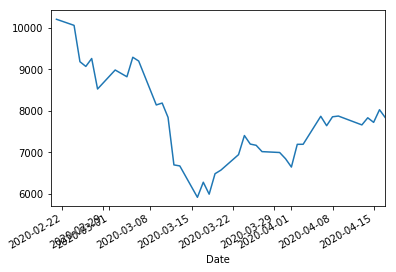

In [63]:
# Plot the returns of the portfolio in terms of money
initial_investment = 10000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot()

In [64]:
# Re-calculate daily returns as the DataFrame was modified in part 1
daily_returns = combined_df.pct_change()
daily_returns.head()

,ETCG,GLD,GBTC,SLV
Date,,,,
2020-02-20,NaN,NaN,NaN,NaN
2020-02-21,0.040212,0.015025,0.017032,0.008168
2020-02-24,-0.008138,0.008985,-0.065391,0.006944
2020-02-25,-0.189744,-0.017874,-0.100683,-0.039655
2020-02-26,-0.034810,0.004371,-0.017078,-0.001795


In [65]:
# Use the `corr` function to calculate the correlation between stock returns
correlation = daily_returns.corr()
correlation

,ETCG,GLD,GBTC,SLV
ETCG,1.000000,0.437394,0.799494,0.546394
GLD,0.437394,1.000000,0.316546,0.761823
GBTC,0.799494,0.316546,1.000000,0.527541
SLV,0.546394,0.761823,0.527541,1.000000


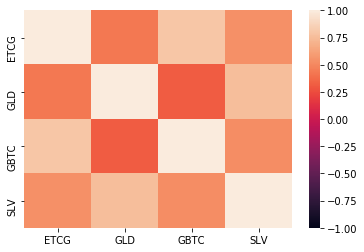

In [66]:
# Use the `heatmap` function from the Seaborn library to visualize the correlation table
sns.heatmap(correlation, vmin=-1, vmax=1)

In [70]:
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios

ETCG   -0.944460
GLD     0.930840
GBTC   -1.766607
SLV    -1.847624
dtype: float64

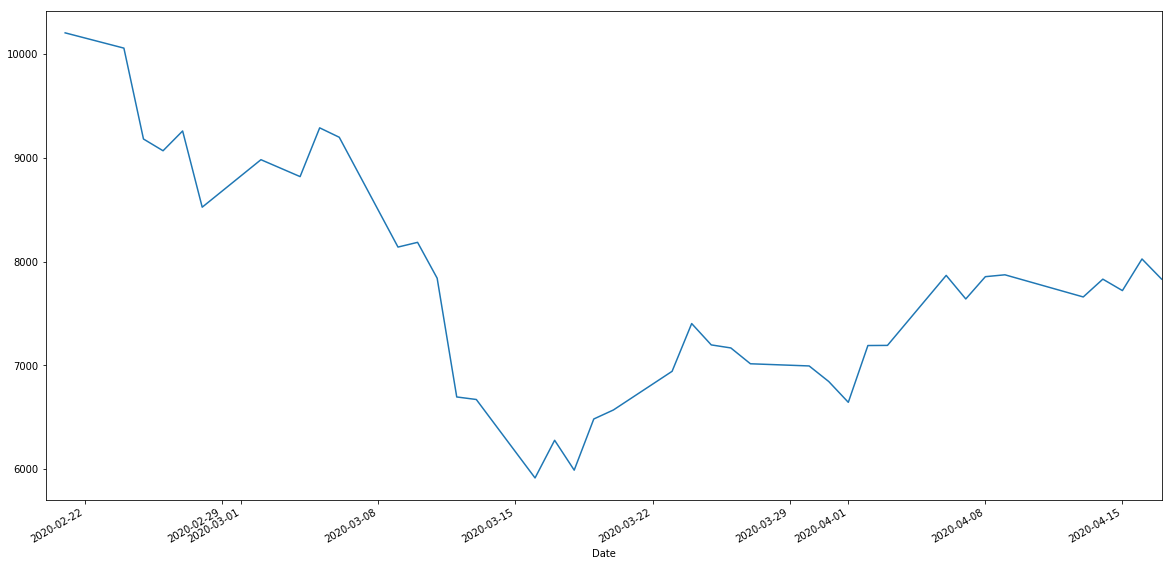

In [71]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Optimized Portfolio
initial_investment = 10000
weights = [.25, .25, .25, .25]
candidate_portfolio_returns = daily_returns.dot(weights)
candidate_cumulative_returns = (1 + candidate_portfolio_returns).cumprod()
candidate_cumulative_profits = (initial_investment * candidate_cumulative_returns)
candidate_cumulative_profits.plot(figsize=(20,10))

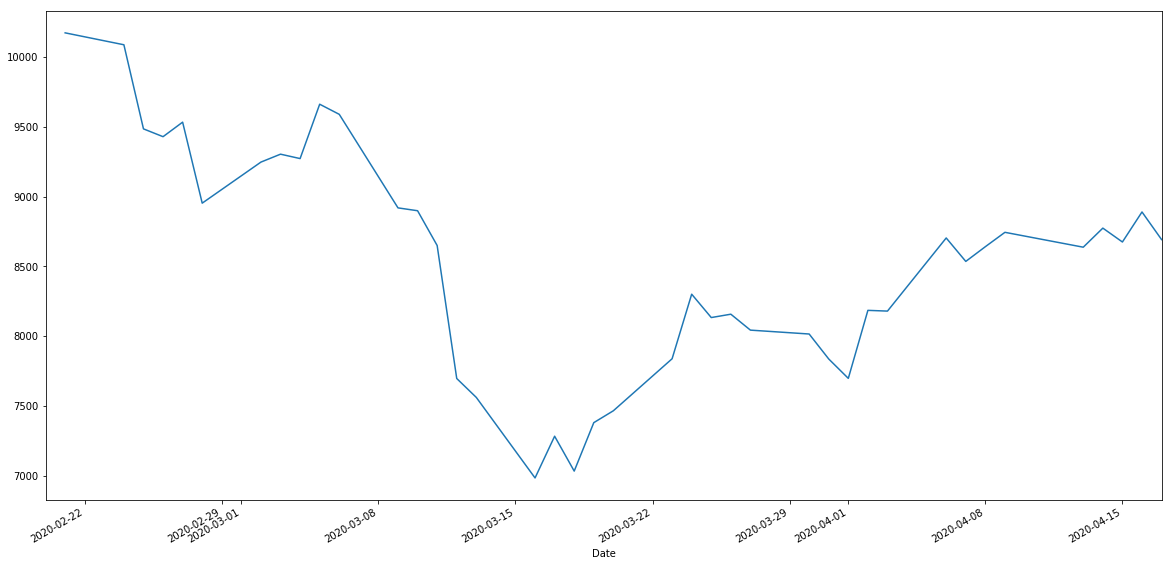

In [75]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Uncorrelated Portfolio
initial_investment = 10000
weights = [0.125, 0.5, 0.2, 0.175]
noncorrelated_portfolio_returns = daily_returns.dot(weights)
noncorrelated_cumulative_returns = (1 + noncorrelated_portfolio_returns).cumprod()
noncorrelated_cumulative_profits = (initial_investment * noncorrelated_cumulative_returns)
noncorrelated_cumulative_profits.plot(figsize=(20,10))

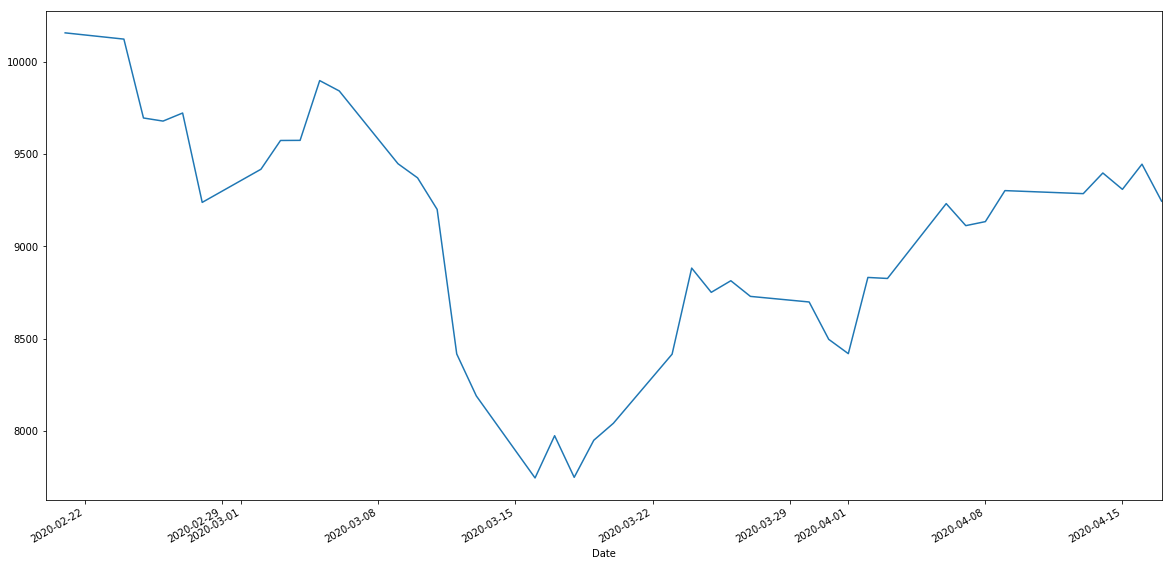

In [76]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Optimized Portfolio
initial_investment = 10000
weights = [.05, .65, .15, .15]
candidate_portfolio_returns = daily_returns.dot(weights)
candidate_cumulative_returns = (1 + candidate_portfolio_returns).cumprod()
candidate_cumulative_profits = (initial_investment * candidate_cumulative_returns)
candidate_cumulative_profits.plot(figsize=(20,10))

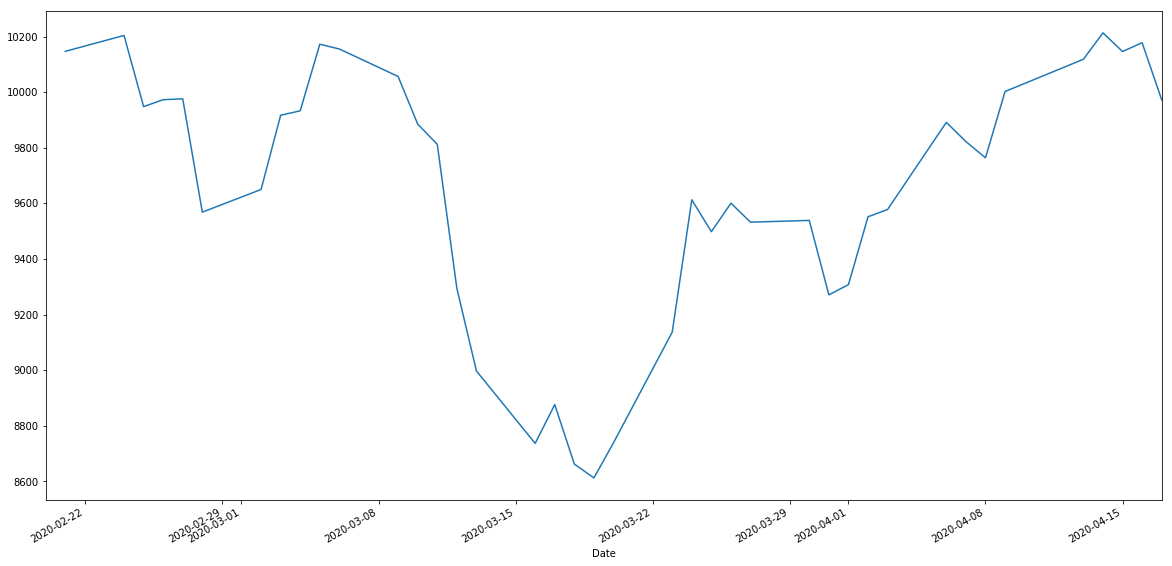

In [77]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Optimized Portfolio
initial_investment = 10000
weights = [.01, .85, .04, .1]
candidate_portfolio_returns = daily_returns.dot(weights)
candidate_cumulative_returns = (1 + candidate_portfolio_returns).cumprod()
candidate_cumulative_profits = (initial_investment * candidate_cumulative_returns)
candidate_cumulative_profits.plot(figsize=(20,10))

In [78]:
daily_returns = combined_df.pct_change()
daily_returns.head()

,ETCG,GLD,GBTC,SLV
Date,,,,
2020-02-20,NaN,NaN,NaN,NaN
2020-02-21,0.040212,0.015025,0.017032,0.008168
2020-02-24,-0.008138,0.008985,-0.065391,0.006944
2020-02-25,-0.189744,-0.017874,-0.100683,-0.039655
2020-02-26,-0.034810,0.004371,-0.017078,-0.001795


In [81]:
avg_daily_return = daily_returns.mean()
avg_daily_return

ETCG   -0.006564
GLD     0.001192
GBTC   -0.009060
SLV    -0.004147
dtype: float64

In [82]:
std_dev_daily_return = daily_returns.std()
std_dev_daily_return

ETCG    0.110320
GLD     0.020331
GBTC    0.081413
SLV     0.035627
dtype: float64

In [ ]:
# Set level 2 of each stock to "(x)close,...," to pull in last price


In [87]:
# Set number of trading days and get last closing price of stocks from DataFrame
num_trading_days = 100
GLD_last_price = combined_df['GLD_close'][-1]
GBTC_last_price = combined_df['GBTC_close'][-1]
ETCG_last_price = combined_df['ETCG_close'][-1]
SLV_last_price = combined_df['SLV_close'][-1]

# Initialize the simulated prices list with the last closing price of stocks
simulated_GLD_prices = [GLD_last_price]
simulated_GBTC_prices = [GBTC_last_price]
simulated_ETCG_prices = [ETCG_last_price]
simulated_SLV_prices = [SLV_last_price]

# Simulate the returns for 100 trading days
for i in range(num_trading_days):
    # Calculate the simulated price using the last price within the list
    GLD_simulated_price = simulated_GLD_prices[-1] * (1 + np.random.normal(avg_daily_return, std_dev_daily_return))
    GBTC_simulated_price = simulated_GBTC_prices[-1] * (1 + np.random.normal(avg_daily_return, std_dev_daily_return))
    ETCG_simulated_price = simulated_ETCG_prices[-1] * (1 + np.random.normal(avg_daily_return, std_dev_daily_return))
    SLV_simulated_price = simulated_SLV_prices[-1] * (1 + np.random.normal(avg_daily_return, std_dev_daily_return))
    # Append the simulated price to the list
    simulated_GLD_prices.append(GLD_simulated_price)
    simulated_GBTC_prices.append(GBTC_simulated_price)
    simulated_ETCG_prices.append(ETCG_simulated_price)
    simulated_SLV_prices.append(SLV_simulated_price)
    
# Create a DataFrame of the simulated prices
simulated_price_df = pd.DataFrame({
    "Simulated GLD Prices": simulated_GLD_prices,
    "Simulated GBTC Prices": simulated_GBTC_prices,
    "Simulated ETCG Prices": simulated_ETCG_prices,
    "Simulated SLV Prices": simulated_SLV_prices
})

# Print head of DataFrame
simulated_price_df.head()

KeyError: 'GLD_close'